In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns





df = pd.read_csv('../input/healthcare-dataset/healthcare_dataset.csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Data analysis and preprocessing




### dataset info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [3]:
#  unique value of each colum just the number



for column in df.columns:

  print(f"{column}: {df[column].nunique()}")

Name: 49992
Age: 77
Gender: 2
Blood Type: 8
Medical Condition: 6
Date of Admission: 1827
Doctor: 40341
Hospital: 39876
Insurance Provider: 5
Billing Amount: 50000
Room Number: 400
Admission Type: 3
Discharge Date: 1856
Medication: 5
Test Results: 3


In [4]:
# prompt: print unique name the values in column Test Results , Blood Type,Medical Condition



for column in [ 'Blood Type', 'Medical Condition','Test Results']:

  print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Unique values in Test Results: ['Normal' 'Inconclusive' 'Abnormal']


### Distribution Count based on Medical Condition



Distribution Count based on Medical Condition:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


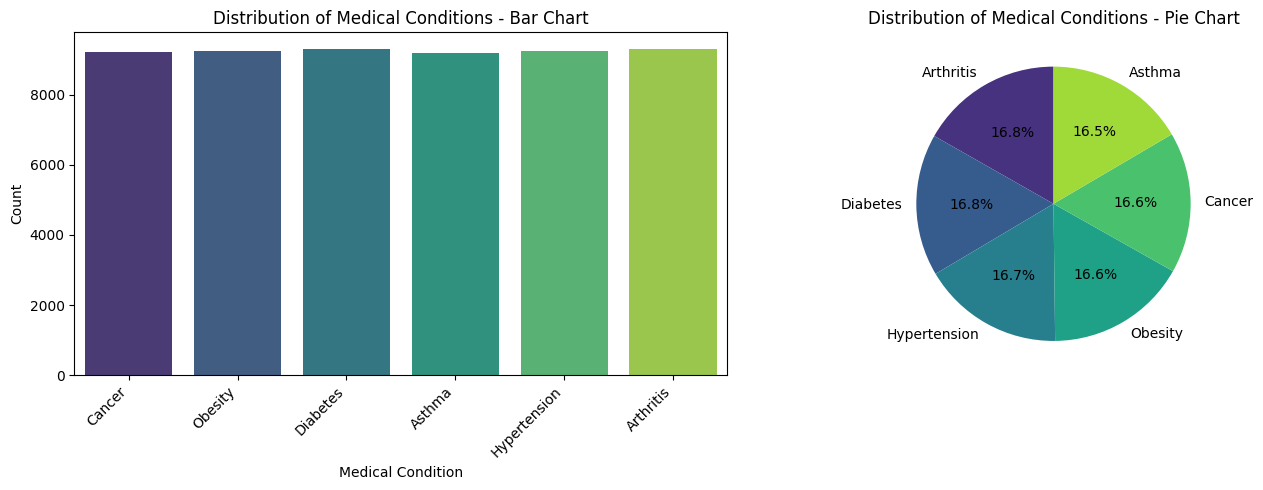

In [5]:


medical_condition_counts = df['Medical Condition'].value_counts()

print("\nDistribution Count based on Medical Condition:")

print(medical_condition_counts)



plt.figure(figsize=(14, 5))



plt.subplot(1, 2, 1)

sns.countplot(x='Medical Condition', data=df, palette='viridis')

plt.title('Distribution of Medical Conditions - Bar Chart')

plt.xlabel('Medical Condition')

plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')



plt.subplot(1, 2, 2)

plt.pie(medical_condition_counts, labels=medical_condition_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Distribution of Medical Conditions - Pie Chart')



plt.tight_layout()

plt.show()


### Distribution Count based on Test Results



Distribution Count based on Test Results:
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


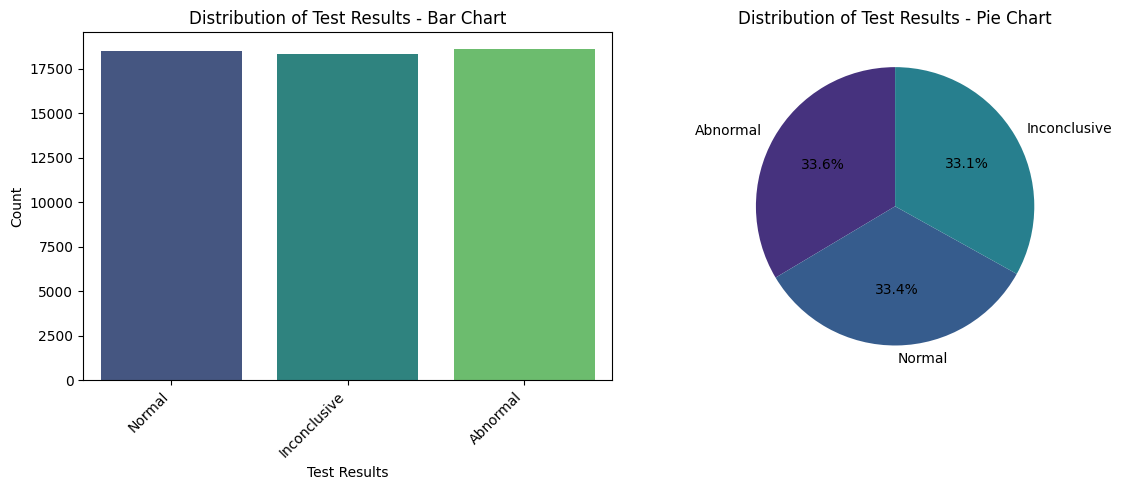

In [6]:


test_results_counts = df['Test Results'].value_counts()

print("\nDistribution Count based on Test Results:")

print(test_results_counts)



plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)

sns.countplot(x='Test Results', data=df, palette='viridis')

plt.title('Distribution of Test Results - Bar Chart')

plt.xlabel('Test Results')

plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')



plt.subplot(1, 2, 2)

plt.pie(test_results_counts, labels=test_results_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Distribution of Test Results - Pie Chart')



plt.tight_layout()

plt.show()


 ###   Distribution Count based on gender




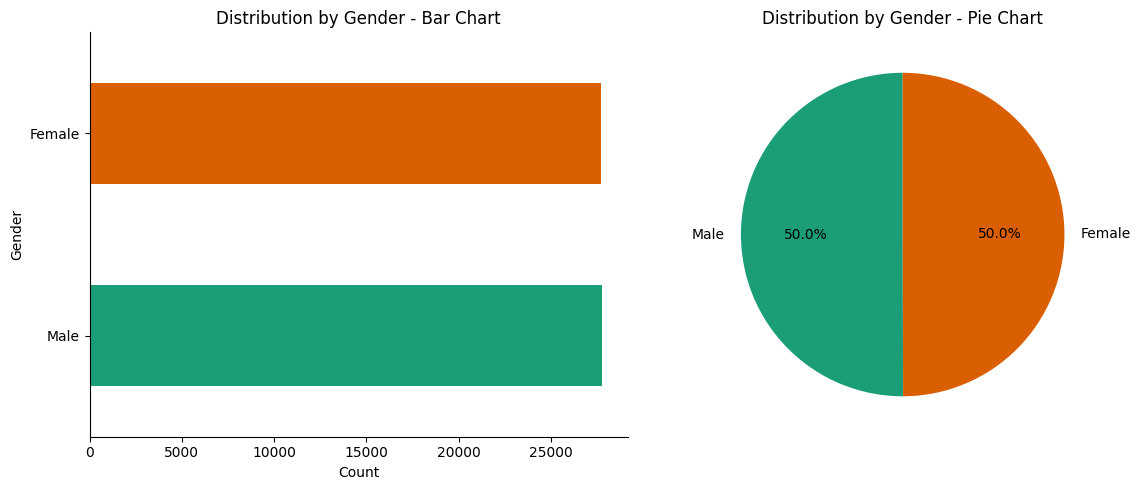

In [7]:


gender_counts = df['Gender'].value_counts()



plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)

gender_counts.plot(kind='barh', color=sns.color_palette('Dark2'))

plt.title('Distribution by Gender - Bar Chart')

plt.xlabel('Count')

plt.gca().spines[['top', 'right']].set_visible(False)



plt.subplot(1, 2, 2)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Dark2'))

plt.title('Distribution by Gender - Pie Chart')



plt.tight_layout()

plt.show()


 ###   Distribution Count based on Blood Type




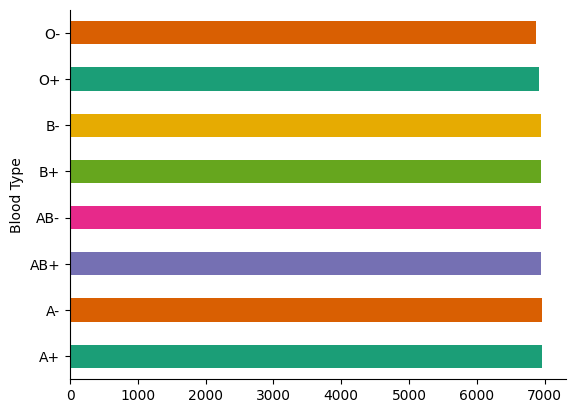

In [8]:
df.groupby('Blood Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

### table of gender and Test Result



Contingency Table (Gender vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9338          9216    9172
Male              9289          9140    9345


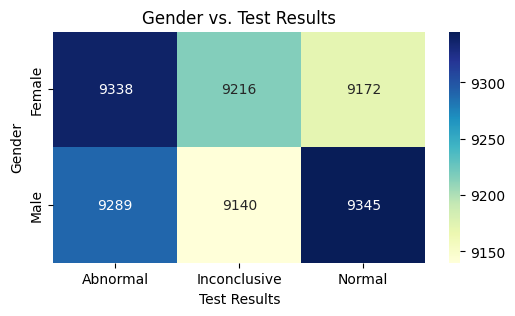

In [9]:


contingency_table = pd.crosstab(df['Gender'], df['Test Results'])



print("\nContingency Table (Gender vs. Test Results):")

print(contingency_table)



plt.figure(figsize=(6,3))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Gender vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Gender")

plt.show()

### table of Blood Type and Test Result



Contingency Table (Blood Type  vs. Test Results):
Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                2333          2330    2293
A-                2336          2298    2335
AB+               2308          2325    2314
AB-               2333          2250    2362
B+                2303          2366    2276
B-                2348          2268    2328
O+                2347          2262    2308
O-                2319          2257    2301


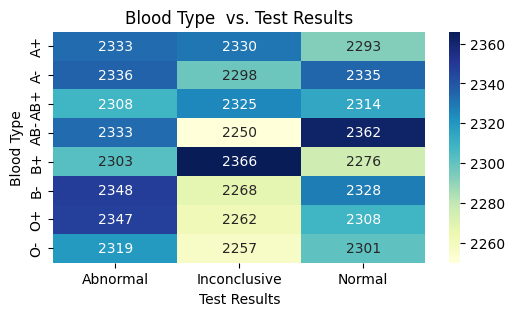

In [10]:


contingency_table = pd.crosstab(df['Blood Type'], df['Test Results'])



print("\nContingency Table (Blood Type  vs. Test Results):")

print(contingency_table)



plt.figure(figsize=(6,3))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Blood Type  vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Blood Type")

plt.show()

### table of Medical Condition and Test Result



Contingency Table (Medical Condition vs. Test Results):
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


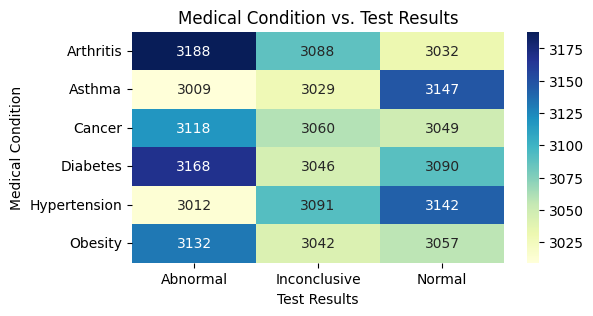

In [11]:


contingency_table = pd.crosstab(df['Medical Condition'], df['Test Results'])



print("\nContingency Table (Medical Condition vs. Test Results):")

print(contingency_table)



# You can also visualize this using a heatmap

plt.figure(figsize=(6,3))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Medical Condition vs. Test Results")

plt.xlabel("Test Results")

plt.ylabel("Medical Condition")

plt.show()

### table of Age and Test Result


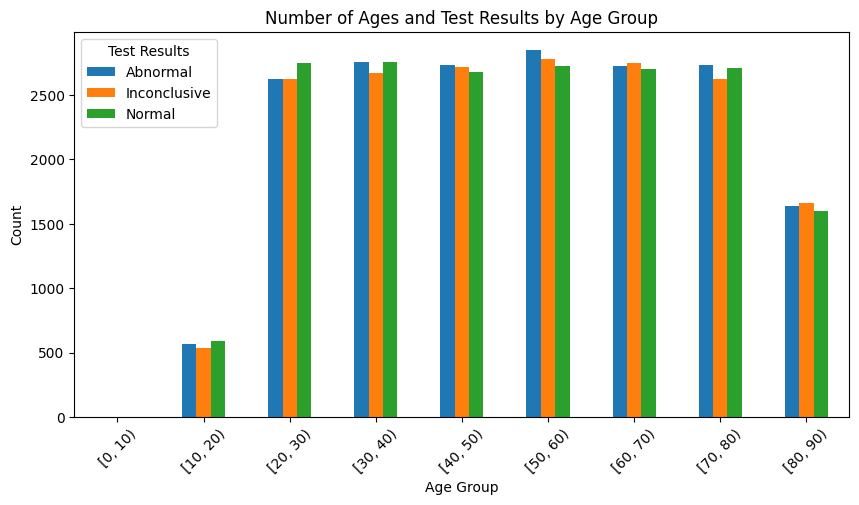

In [12]:


# Create age groups

df['Age Group'] = pd.cut(df['Age'], bins=range(0, 100, 10), right=False)



# Group by age group and test results, then count the occurrences

grouped_data = df.groupby(['Age Group', 'Test Results'] , observed=False)['Age'].count().unstack()



# Plot the bar chart

grouped_data.plot(kind='bar', figsize=(10,5))

plt.title('Number of Ages and Test Results by Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Test Results')

plt.show()

# Can Machine Learning Classification Algorithms help to predict Test Result ?

### test classification algorithms and compare their results

In [13]:


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Encode categorical features

le_gender = LabelEncoder()

le_blood_type = LabelEncoder()

le_medical_condition = LabelEncoder()

le_Medication = LabelEncoder()



le_test_results = LabelEncoder()



df['Gender'] = le_gender.fit_transform(df['Gender'])

df['Blood Type'] = le_blood_type.fit_transform(df['Blood Type'])

df['Medical Condition'] = le_medical_condition.fit_transform(df['Medical Condition'])

df['Medication'] = le_Medication.fit_transform(df['Medication'])

df['Test Results'] = le_test_results.fit_transform(df['Test Results'])





# Define features (X) and target (y)

X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication']]

y = df['Test Results']



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize classification models

models = {


    'Decision Tree': DecisionTreeClassifier(),

    'Random Forest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),

    'K-Nearest Neighbors': KNeighborsClassifier()

}



# Train and evaluate each model

results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {

        'Accuracy': accuracy,

        'Classification Report': classification_report(y_test, y_pred ,zero_division=1 ),

        'Confusion Matrix': confusion_matrix(y_test, y_pred,)

    }



# Print results

for model_name, result in results.items():

    print(f"\nModel: {model_name}")

    print(f"Accuracy: {result['Accuracy']:.4f}")

    print("Classification Report:")

    print(result['Classification Report'])

    print("Confusion Matrix:")

    print(result['Confusion Matrix'])







Model: Decision Tree
Accuracy: 0.3361
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.43      0.38      3754
           1       0.32      0.32      0.32      3617
           2       0.34      0.25      0.29      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.33     11100
weighted avg       0.34      0.34      0.33     11100

Confusion Matrix:
[[1631 1203  920]
 [1553 1162  902]
 [1577 1214  938]]

Model: Random Forest
Accuracy: 0.3324
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33      3754
           1       0.32      0.33      0.32      3617
           2       0.34      0.34      0.34      3729

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.33     11100
weighted avg       0.33      0.33      0.33     11100

Confusion Matrix:
[[1243 1273 1238]
 [123

## As a result, we can see that none of the machine learning classification algorithms can get a good accuracy in prediction